/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


numpy signal shape (751072,)


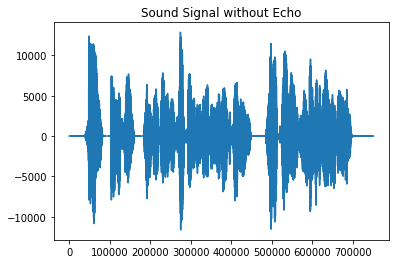

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from scipy.io.wavfile import write
spf = wave.open('nicole.wav','r')
signal = spf.readframes(-1)
signal = np.fromstring(signal,'Int16')
print('numpy signal shape',signal.shape)

plt.plot(signal)
plt.title("Sound Signal without Echo")
plt.show()

(751074,)


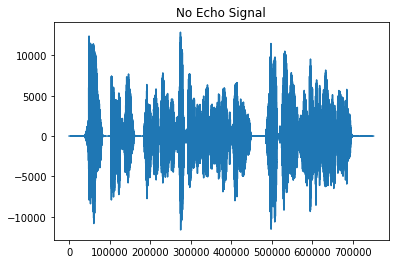

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [2]:
delta = np.array([1.,0.,0.])
noecho = np.convolve(signal,delta)
print(noecho.shape)

plt.plot(noecho)
plt.title("No Echo Signal")
plt.show()

noecho

In [3]:
noecho = noecho.astype(np.int16)
write('nicole_noecho.wav',90100,noecho)

In [3]:
filt = np.zeros(90100)

In [36]:
filt

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [4]:
#Repeat original sample every quarter of a second with low amplitude or volume
#The sampling rate means sample per second. Some sounds have 16000 some have more.
#In this case the sound has 84000 sampling rate
filt[0]=1
filt[11000]=.6
filt[22500]=.3
filt[45000]=.2
filt[90099]=.1
out = np.convolve(signal,filt)
out = out.astype(np.int16)
write('out.wav',90100,out)